MLP - MNIST

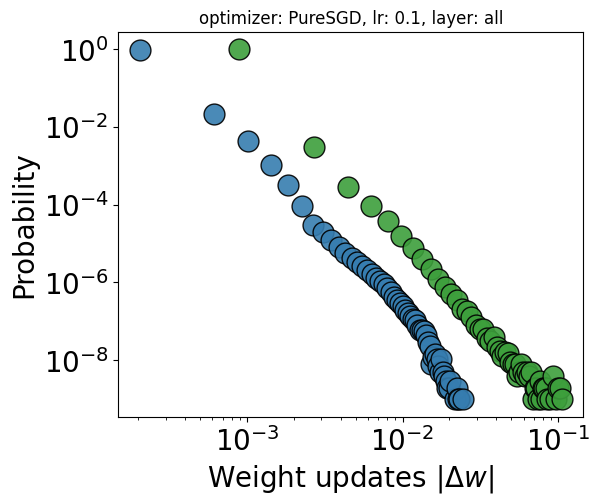

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

from scipy.optimize import curve_fit
from scipy.stats import kstest
import gc
from matplotlib.lines import Line2D

def log_bin(xbins, nums, bins=10):
    logbins = np.logspace(np.log10(min(xbins)), np.log10(max(xbins)), bins)
    bin_centers = np.sqrt(logbins[:-1] * logbins[1:])
    binned_nums = np.histogram(xbins, bins=logbins, weights=nums)[0]
    binned_counts = np.histogram(xbins, bins=logbins)[0]
    mean_nums = binned_nums / (binned_counts + 1e-10) 
    return bin_centers, mean_nums


layer = ['all']
colorlist = ['#3D9F3C', '#367DB0']
labelsize=20
opti = 'PureSGD'
lr_list = [0.1]
for i, lr in enumerate(lr_list):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for ll in layer:
        suffixes = ['5000-10000', '25000-30000']
        for idx, suffix in enumerate(suffixes):
            st = int(suffix.split('-')[0])

            ed = int(suffix.split('-')[1])

            xbins = np.load(f'update_MNIST_2MLP_optim{opti}_lr{lr}_st{st}_ed{ed}_xbins.npy')
            nums = np.load(f'update_MNIST_2MLP_optim{opti}_lr{lr}_st{st}_ed{ed}_nums.npy')

            ax.loglog(xbins, nums, 'o', markersize=15, alpha=0.9,
                    color=colorlist[idx], markeredgecolor='black',
                    label=f'{int(st-5000)}-{ed}')

            ax.set_xlabel(r'Weight updates $|\Delta w|$',fontsize=labelsize)
            ax.set_ylabel('Probability', fontsize=labelsize)
            ax.set_title(f'optimizer: {opti}, lr: {lr}, layer: {ll}')

        ax.xaxis.set_tick_params(labelsize=labelsize)
        ax.yaxis.set_tick_params(labelsize=labelsize)

        plt.show()

CNN - CIFAR

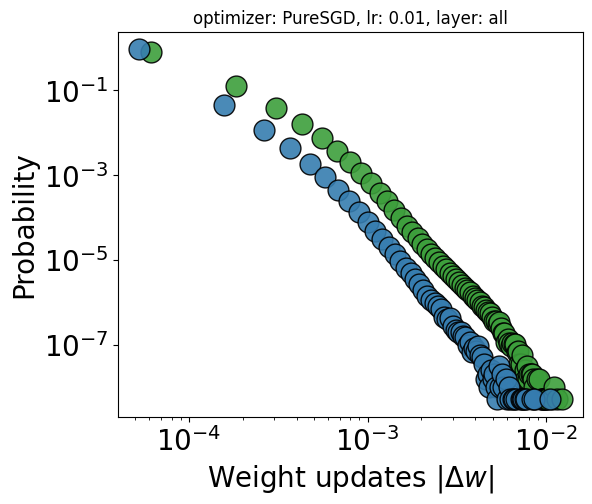

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from scipy.stats import kstest

layer = ['all']
colorlist = ['#3D9F3C', '#367DB0']
labelsize=20
for opti in ['PureSGD']:
    lr_list = [0.01]
    for i, lr in enumerate(lr_list):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for ll in layer:
            suffixes = ['200-10000', '20200-30000']
            for idx, suffix in enumerate(suffixes):
                st = int(suffix.split('-')[0])
                ed = int(suffix.split('-')[1])

                xbins = np.load(f'update_CIFAR_CNN_optim{opti}_lr{lr}_st{st}_ed{ed}_xbins.npy')
                nums = np.load(f'update_CIFAR_CNN_optim{opti}_lr{lr}_st{st}_ed{ed}_nums.npy')
                ax.loglog(xbins, nums, 'o', markersize=15, alpha=0.9,
                        color=colorlist[idx], markeredgecolor='black',
                        label=f'{int(st-5000)}-{ed}')

                ax.set_xlabel(r'Weight updates $|\Delta w|$', fontsize=labelsize)
                ax.set_ylabel('Probability', fontsize=labelsize)
                ax.set_title(f'optimizer: {opti}, lr: {lr}, layer: {ll}')

            ax.xaxis.set_tick_params(labelsize=labelsize)
            ax.yaxis.set_tick_params(labelsize=labelsize)
            plt.show()


Transformer

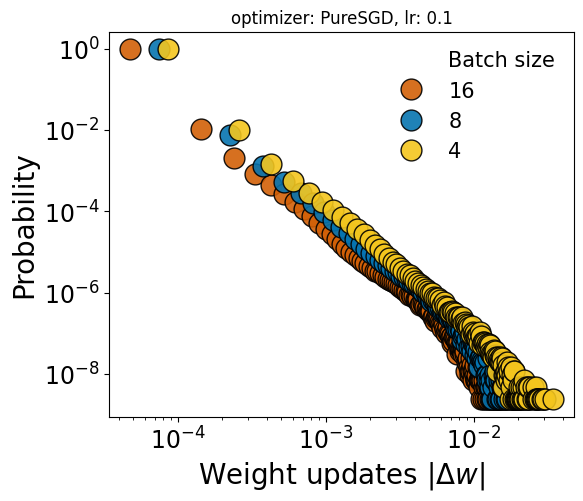

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import kstest
from matplotlib.lines import Line2D


colorlist = ['#D26007','#0674B0','#F4C61E','#A0D3E8','#F4C61E','#0674B0']
labelsize=20
suffixes = ['200-1000']
bslist = [16,8,4]
for idx, suffix in enumerate(suffixes):
    opti ='PureSGD'
    lr_list = [0.1]
    for i, lr in enumerate(lr_list):
        for attr in ['both']:
            fig, ax = plt.subplots(1, 1, figsize=(6, 5))
            for idx, bs in enumerate(bslist):
                st = int(suffix.split('-')[0])
                ed = int(suffix.split('-')[1])

                xbins = np.load(f'update_charac_transformer_optim{opti}_lr{lr}_st{st}_ed{ed}_bs{bs}_xbins.npy')
                nums = np.load(f'update_charac_transformer_optim{opti}_lr{lr}_st{st}_ed{ed}_bs{bs}_nums.npy')
                ax.loglog(xbins, nums, 'o', markersize=15, alpha=0.9,
                            color=colorlist[idx], markeredgecolor='black', label=f'{bs}')

               
                ax.set_xlabel(r'Weight updates $|\Delta w|$', fontsize=labelsize)
                ax.set_ylabel('Probability', fontsize=labelsize)
                ax.set_title(f'optimizer: {opti}, lr: {lr}')

            group_label = Line2D([], [], color='none', label='Batch size')
            handles, labels = ax.get_legend_handles_labels()
            handles.insert(0, group_label)
            labels.insert(0, 'Batch size')
            ax.legend(handles, labels,  fontsize=labelsize-5,frameon=False)
            ax.xaxis.set_tick_params(labelsize=labelsize-3)
            ax.yaxis.set_tick_params(labelsize=labelsize-3)

            plt.show()
